<a href="https://colab.research.google.com/github/eeshahar/data-science/blob/main/eeshhari_unit4project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install "preliz[full,notebook]"


In [ ]:
import preliz as pz


In [ ]:
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
import arviz as az
import graphviz as gv
import pymc as pm


In [ ]:
url_bb_data = 'https://raw.githubusercontent.com/thedarredondo/data-science-fundamentals/main/Data/basketball2324.csv'
bb_data = pd.read_csv(url_bb_data)

bb_data

,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,...,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,Player-additional
0,Precious Achiuwa,PF-C,24,TOT,74,18,1624,235,469,0.501,...,191,296,487,97,46,68,83,143,565,achiupr01
1,Bam Adebayo,C,26,MIA,71,71,2416,530,1017,0.521,...,159,578,737,278,81,66,162,159,1367,adebaba01
2,Ochai Agbaji,SG,23,TOT,78,28,1641,178,433,0.411,...,74,142,216,83,47,44,64,117,455,agbajoc01
3,Santi Aldama,PF,23,MEM,61,35,1618,247,568,0.435,...,72,280,352,138,43,54,69,89,654,aldamsa01
4,Nickeil Alexander-Walker,SG,25,MIN,82,20,1921,236,538,0.439,...,35,132,167,204,64,42,76,143,655,alexani01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
567,Thaddeus Young,PF,35,TOT,33,6,439,65,108,0.602,...,46,57,103,57,23,5,15,49,137,youngth01
568,Trae Young,PG,25,ATL,54,54,1942,433,1008,0.430,...,23,126,149,583,72,11,235,109,1389,youngtr01
569,Omer Yurtseven,C,25,UTA,48,12,545,99,184,0.538,...,72,136,208,29,8,18,37,52,222,yurtsom01
570,Cody Zeller,C,31,NOP,43,0,320,26,62,0.419,...,48,64,112,39,9,5,16,45,76,zelleco01


In [ ]:
# from gemini
# Focus only on players who have played enough minutes (e.g., > 100) and have a defined position.
df_clean = bb_data.query('MP > 100 and Pos.notna()').copy()

# 3. Prepare Data for PyMC
# Create numerical indices for each position and a coordinate map for arviz
positions = df_clean['Pos'].unique()
pos_map = {pos: i for i, pos in enumerate(positions)}
df_clean['pos_idx'] = df_clean['Pos'].map(pos_map)

# PyMC Inputs
coords = {'position': positions}
trb_data = df_clean['TRB'].values
pos_index = df_clean['pos_idx'].values

In [ ]:
bb_data

,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,...,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,Player-additional
0,Precious Achiuwa,PF-C,24,TOT,74,18,1624,235,469,0.501,...,191,296,487,97,46,68,83,143,565,achiupr01
1,Bam Adebayo,C,26,MIA,71,71,2416,530,1017,0.521,...,159,578,737,278,81,66,162,159,1367,adebaba01
2,Ochai Agbaji,SG,23,TOT,78,28,1641,178,433,0.411,...,74,142,216,83,47,44,64,117,455,agbajoc01
3,Santi Aldama,PF,23,MEM,61,35,1618,247,568,0.435,...,72,280,352,138,43,54,69,89,654,aldamsa01
4,Nickeil Alexander-Walker,SG,25,MIN,82,20,1921,236,538,0.439,...,35,132,167,204,64,42,76,143,655,alexani01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
567,Thaddeus Young,PF,35,TOT,33,6,439,65,108,0.602,...,46,57,103,57,23,5,15,49,137,youngth01
568,Trae Young,PG,25,ATL,54,54,1942,433,1008,0.430,...,23,126,149,583,72,11,235,109,1389,youngtr01
569,Omer Yurtseven,C,25,UTA,48,12,545,99,184,0.538,...,72,136,208,29,8,18,37,52,222,yurtsom01
570,Cody Zeller,C,31,NOP,43,0,320,26,62,0.419,...,48,64,112,39,9,5,16,45,76,zelleco01


(array([252.,  90.,  70.,  57.,  34.,  34.,  15.,   9.,   7.,   4.]),
 array([   0.,  237.,  474.,  711.,  948., 1185., 1422., 1659., 1896.,
        2133., 2370.]),
 <BarContainer object of 10 artists>)

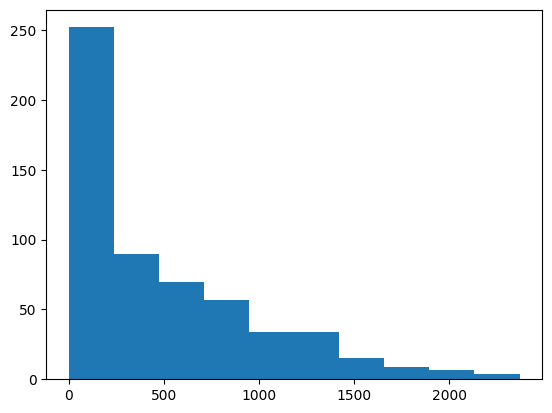

In [ ]:
plt.hist(bb_data['PTS'])



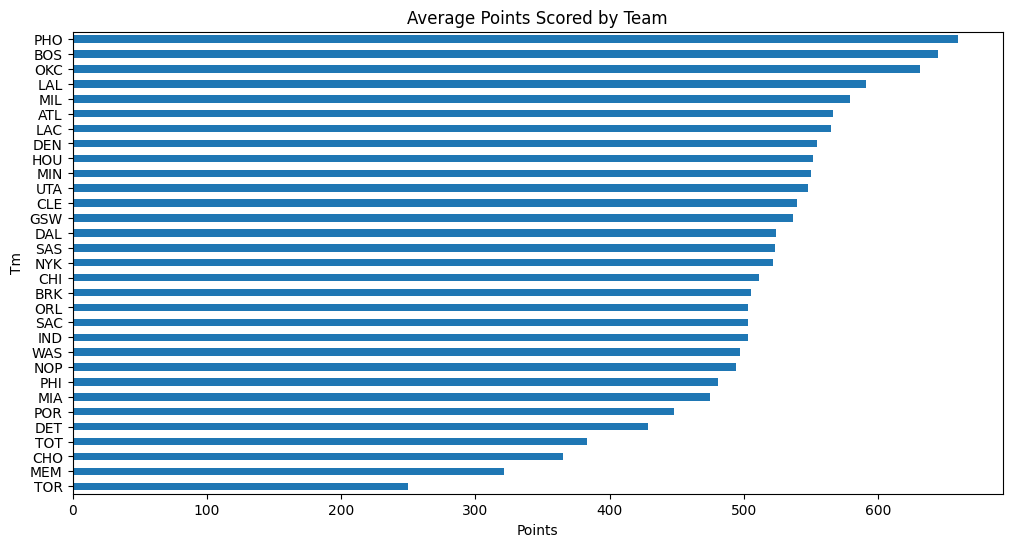

In [ ]:
#from chatGPT
plt.figure(figsize=(12,6))
bb_data.groupby("Tm")["PTS"].mean().sort_values().plot(kind="barh")
plt.title("Average Points Scored by Team")
plt.xlabel("Points")
plt.show()

In [ ]:
bb_encode = pd.Categorical(bb_data['Tm'])
bb_encode

['TOT', 'MIA', 'TOT', 'MEM', 'MIN', ..., 'TOT', 'ATL', 'UTA', 'NOP', 'LAC']
Length: 572
Categories (31, object): ['ATL', 'BOS', 'BRK', 'CHI', ..., 'TOR', 'TOT', 'UTA', 'WAS']

In [ ]:
bb_idx = bb_encode.codes
bb_idx

In [ ]:
bb_coords = {"Tm": bb_encode.categories}
bb_coords

In [ ]:
with pm.Model(coords = bb_coords) as bb_h_model_template:

  # Hyperpriors
  μ_overall = pm.Normal('μ_overall', mu = 0, sigma = 5)
  σ_overall = pm.HalfNormal('σ_overall', sigma = 3)
  nu_overall = pm.Exponential('nu_overall', lam = 0.5)

  # Team-specific priors
  μ_team = pm.StudentT('μ_team', mu = μ_overall, sigma = σ_overall, nu = nu_overall, dims = "Tm")
  σ_team = pm.HalfNormal('σ_team', sigma = 10, dims = "Tm")
  nu_team = pm.Exponential('nu_team', lam = 0.5, dims = "Tm")

  # Likelihood
  y = pm.StudentT('y', mu = μ_team[bb_idx], sigma = σ_team[bb_idx], nu = nu_team[bb_idx],
                  observed = bb_data["PTS"])

  idata_bb_h_template = pm.sample(draws=4000, tune=4000, target_accept=0.95)

 Progress                    Draws   Divergences   Step size   Grad evals   Sampling Speed   Elapsed   Remaining  
 ───────────────────────────────────────────────────────────────────────────────────────────────────────────────── 
  ━━━━━━━━━━━━━━━━━━━━━╺━━━   6833    0             0.013       127          26.08 draws/s    0:04:22   0:00:44    
  ━━━━━━━━━━━━━━━━━━━━━━━━━   0       0             0.000       0            0.00 draws/s     0:04:22   -:--:--

In [ ]:
with pm.Model(coords=coords) as trb_hierarchical_model:
    # --- LEVEL 3: HYPERPRIORS (Shared across all groups) ---

    # Hyperprior for the overall League Mean (μ_grand)
    μ_grand = pm.Normal('μ_grand', mu=np.mean(trb_data), sigma=20)

    # Hyperprior for the variability of the group means (σ_grand)
    # This dictates how much position means (μ_pos) are allowed to vary from μ_grand
    σ_grand = pm.HalfNormal('σ_grand', sigma=10)

    # Prior for the shared degrees of freedom (nu)
    # A prior on nu > 1 ensures the mean is defined.
    # An Exponential is common, pulled towards smaller values (heavy tails).
    ν_shared = pm.Exponential('ν_shared', 1/29) + 1 # +1 to ensure ν > 1

    # --- LEVEL 2: GROUP PRIORS (Position-specific parameters, DEPENDENT on Hyperpriors) ---

    # Priors for the position-specific means (μ_pos). This is the hierarchical link.
    # The mean of each position (μ_pos) is drawn from the league-wide distribution (μ_grand, σ_grand).
    μ_pos = pm.Normal('μ_pos', mu=μ_grand, sigma=σ_grand, dims="position")

    # Priors for the position-specific scales (σ_pos).
    # These also need a prior, typically HalfNormal or HalfCauchy.
    σ_pos = pm.HalfNormal('σ_pos', sigma=10, dims="position")

    # --- LEVEL 1: LIKELIHOOD (Connects model to data) ---

    # Likelihood: The observed TRB data is modeled by a StudentT distribution.
    # We index the position-specific parameters (μ_pos, σ_pos) using pos_index.
    y_likelihood = pm.StudentT(
        'TRB_observed',
        mu=μ_pos[pos_index],
        sigma=σ_pos[pos_index],
        nu=ν_shared,
        observed=trb_data
    )

    # --- INFERENCE ---
    idata_trb = pm.sample(draws=2000, tune=1000, target_accept=0.9)

In [ ]:
az.plot_forest(idata_trb, var_names=['μ_pos'], combined=True)

In [ ]:
pm.sample_posterior_predictive(
    idata_trb,
    model=trb_hierarchical_model,
    extend_inferencedata=True
)

In [ ]:
# Plot the overall distribution check
az.plot_ppc(idata_trb, data_vars=['TRB_observed'], kind='kde', figsize=(10, 5))
plt.title("Posterior Predictive Check (Overall)")

In [ ]:
with pm.Model(coords=coords) as trb_non_hierarchical_model:

    # Separate, independent priors for each position (No sharing/Hyperpriors)
    # The priors are just set to a fixed, non-hierarchical distribution.

    # Independent means (μ_pos)
    μ_pos = pm.Normal('μ_pos', mu=np.mean(trb_data), sigma=20, dims="position")

    # Independent scales (σ_pos)
    σ_pos = pm.HalfNormal('σ_pos', sigma=10, dims="position")

    # Independent degrees of freedom (ν_pos)
    ν_pos = pm.Exponential('ν_pos', 1/29, dims="position") + 1

    # Likelihood remains the same, but uses independent parameters
    y_likelihood = pm.StudentT(
        'TRB_observed',
        mu=μ_pos[pos_index],
        sigma=σ_pos[pos_index],
        nu=ν_pos[pos_index],
        observed=trb_data
    )

    idata_trb_nh = pm.sample(draws=2000, tune=1000, target_accept=0.9)